:::{.column-page}

<div class="herosection-title">

##### What I learned as a Junior Backend Software Engineer at Lyft - A Forage Job Simulation Experience
</div>

:::

:::{.column-page}
<em>Tags:</em>
<span class="badge bg-secondary">Design Patterns</span>
<span class="badge bg-secondary">Python Programming</span>
<span class="badge bg-secondary">Test Driven Development</span>
<span class="badge bg-secondary">Unittesting</span>

:::

:::{.column-page}

<img class="hero-image" src="assets/heroimage2.webp" alt="Lyft Image">

:::

:::{.column-page}
<div>
<p>Author: <a href="https://www.linkedin.com/in/tagbor-simon-gabriel/" style="color: blue; text-decoration:none;">Simon Tagbor</a> 📅 10th March, 2024</p>
</div>

:::

:::{.column-page}

## Introduction

:::

:::{.column-page}
<section class="intro-section"> 
<div class="intro">
<p>I did a job simulation as a junior backend software engineer at Lyft on [Forage](https://www.theforage.com/virtual-experience/xSw9echtixLAoPdsH/lyft/back-end-engineering-he82/).</p> 
<p>The goal was straight forward:</p> 
<figure class="text-center">
<blockquote class="blockquote">
<p class="mb-0">Implement a Re-design of an Existing Codebase for Lyft's Rental Fleet Logistics System.</p>
</blockquote>
</figure>
<p>The New design is expected to make the Codebase more modular and scalable.</p>
<p>The implementation of the new design is also expected to have extensive test coverage</p>
<p>If you're curious about trying this job simulation feel free to check out the full experience on <a href="https://www.theforage.com/virtual-experience/xSw9echtixLAoPdsH/lyft/back-end-engineering-he82">Forage</a>
</p>
<p>I Thoroughly enjoyed the experience and in this blog post, I will share the main highlights of my process.
</p>
<p>Feel free to reach out to me on X <a href="https://twitter.com/clawd_johan">@clawd_johan</a> if you have any questions or feedback.
</p>
</div>

<!-- The button that opens project summary modal -->
<button id="myBtn" class="btn btn-outline-primary">Show Project Summary</button>

</section>

:::

<p>Let's begin by looking at the context of the problem and the existing codebase.
</p>

## Situation

<p>I inherited a codebase from a previous engineer who started working on a new system for managing the maintenance of the types of vehicles in LYFT's rental fleet. The previous engineer had to be assigned to another project. As a junior backend engineer, I was tasked to build on his existing work</p>

<p>
From an <a href="https://en.wikipedia.org/wiki/Object-oriented_programming">Object Oriented Program design</a> perspective, the codebase left behind by the engineer is not easily extensible and maintainable. The design relies almost entirely on <a href="https://en.wikipedia.org/wiki/Inheritance_(object-oriented_programming)">inheritance</a> to model vehicles in LYFT's rental fleet, complete with their servicing criteria.</p> 
<p>Consequently, the codebase has been riddled with components that have deep inheritance hierarchies. Servicing criteria may change frequently as LYFT's rental fleet evolves. Introducing new updates in the current codebase will require making changes to many parts of the codebase, thereby increasing the chances of introducing several time-consuming bugs while also running the risk of duplicating code</p>
<p>Even more so, the codebase lacks unit tests with extensive coverage. LYFT fleet management system would be better off with a new and extensively tested design of the backend business logic </p>

## Tasks

<p>For this project, I completed the following tasks:</p>

<ul class="list-group">
<li class="list-group-item d-flex justify-content-between align-items-center">
Task 1: Re-designed backend Business Logic for Fleet Management System.
<span>✅</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
Task 2: Refactored and Optimized Codebase
<span>✅</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
Task 3: Wrote Extensive Unittests
<span>✅</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
Task 4: Implement a New Tire Servicing Criteria.
<span>✅</span>
</li>
</ul>

## Actions

### 1. Backend Business Logic Re-Design

#### Design Challenges With The Existing Codebase
<img src="https://github.com/Simontagbor/forage-lyft-starter-repo/assets/62922135/d01e815d-adfb-4f80-bb58-262fed483e47" alt="Current Design - LYFT Rental Fleet logistics System Component drawio (1)" style="width:100%;height:60%; margin-bottom:5px;">
<p>As can be seen from the above <a href="https://en.wikipedia.org/wiki/Unified_Modeling_Language">UML diagram</a>, The Previous Engineer used a convoluted inheritance hierarchy to handle the different types of vehicles in the fleet. 
<p>The Engineer created different car models in  LYFT's fleet by subclassing three unique engine types which are also by themselves, an extension of <code>Car</code> and <code>ABC</code> parent classes.</p>
<h4>The 3 Key Pain Points Identified in the Existing Codebase:</h4>
<ul class="list-group">
<li class="list-group-item d-flex justify-content-between align-items-center">
<p>1. Difficulty in adding new vehicle types to the fleet.</p>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
<p> 2. Managing Variations in Vehicle Features will be Cumbersome.</p>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
<p>3. Convoluted Inheritance Hierarchy makes the codebase tightly coupled</p>
</li>
</ul>
<h4>Finding Solutions</h4>
<p>After gathering enough details about the goals of the fleet management system and familiarising myself with the codebase, I looked into design patterns that could help address the key design challenges.
</p>

<p>I used a combination of design patterns and object-oriented program design principles to sanitize the codebase. The thought process behind the design choices is further discussed below:</p>
<div class="accordion" id="accordionExample">
<div class="accordion-item">
<h2 class="accordion-header" id="headingOne">
<button class="accordion-button collapsed" type="button" data-bs-toggle="collapse" data-bs-target="#collapseOne" aria-expanded="false" aria-controls="collapseOne" style="border-left:none;">
  Strategy Design Pattern
</button>
</h2>
<div id="collapseOne" class="accordion-collapse collapse" aria-labelledby="headingOne" data-bs-parent="#accordionExample" style="">
<div class="accordion-body">
<strong class="text-secondary">Strategy Design Pattern</strong>
<p>This design pattern choice felt more natural for instances where we will be handling different vehicles with unique algorithms for determining servicing needs. A typical strategy design pattern approach would involve creating a <code>Serviceable</code> interface - an abstract class of anything that can be serviced with a <code>needs_service</code> abstract method. Different <code>Car</code> subclasses of the interface would then encapsulate their own <code>needs_service</code> algorithms for determining when its instances should be serviced.</p>
<p>The strategy design pattern makes it more straightforward to add new vehicles and it also ensures that each new <code>Car</code> variant has its own <em><strong>strategy</strong></em> for determining servicing needs implemented. For instance, LYFT may decide in the future to add a <code>Motorbike</code> and <code>Segway</code> to its fleet. The <code>Serviceable</code> interface makes it easier to extend the codebase to meet the new requirements with fewer breaking changes. You can read more about  about The strategy design pattern <a href="https://refactoring.guru/design-patterns/strategy">Here</a></p>
</div>
</div>
</div>
<div class="accordion" id="accordionExample">
<div class="accordion-item">
<h2 class="accordion-header" id="headingTwo">
<button class="accordion-button collapsed" type="button" data-bs-toggle="collapse" data-bs-target="#collapseTwo" aria-expanded="false" aria-controls="collapseTwo" style="border-left:none;">
  Factory Design Pattern
</button>
</h2>
<div id="collapseTwo" class="accordion-collapse collapse" aria-labelledby="headingTwo" data-bs-parent="#accordionExample" style="">
<div class="accordion-body">
<strong class="text-secondary">Factory Design Pattern</strong>
<p>Considering that our fleet management system will be instantiating several vehicle types across the codebase, it will be helpful to use a <a href="https://sourcemaking.com/design_patterns/creational_patterns">creational design parttern</a> to organize the logic of how vehicles in the fleet get created in one place. Similar to other creational design patterns, the factory design pattern attempts to encapsulate the logic for creating variants of <code>Car</code> instances in one well-defined <code>CarFactory</code> class interface.</p>
<p>This approach abstracts how a <code>Car</code> instance gets created, making it possible to isolate the client from having to know how the instances get "assembled". For example, if the specification requires that a <code>Calliope</code> car object should have a particular <code>Engine</code>, <code>Battery</code> and <code>Tire</code> components, the <code>CarFactory</code> interface will provide a <code>.create_calliope_car(...)</code> public method that puts the right components together and returns a calliope car object to the client. 
<p>The factory design pattern allows for a much cleaner codebase and any problem with our object creation logic can be easily isolated during debugging because now the creation of objects is independent of the client that uses them. you can learn more about the Factory Design Pattern <a href="https://refactoring.guru/design-patterns/factory-method">here</a></p>
</div>
</div>
</div>
<div class="accordion" id="accordionExample">
<div class="accordion-item">
<h2 class="accordion-header" id="headingThree">
<button class="accordion-button collapsed" type="button" data-bs-toggle="collapse" data-bs-target="#collapseThree" aria-expanded="false" aria-controls="collapseThree" style="border-left:none;">
  Composition Over Inheritance
</button>
</h2>
<div id="collapseThree" class="accordion-collapse collapse" aria-labelledby="headingThree" data-bs-parent="#accordionExample" style="">
<div class="accordion-body">
<strong class="text-secondary">Composition Over Inheritance</strong>
<p>I used the design principle of "<a href="https://en.wikipedia.org/wiki/Composition_over_inheritance">composition over inheritance</a>" to address the pain point of complex and deep inheritance hierarchy in the codebase. In the current design, components are too tightly coupled making the codebase less modular. favoring composition - where we create a complete unit of components(<em>also known as composites</em>) that are independent of other components and assign them as attributes of a class that depends on them.</p>
<p>For example cars in LYFT's fleet will need <em>to have</em> <code>Engine</code> and <code>Battery</code> components to determine servicing needs. The inheritance approach would be to let the <code>Car</code> class subclass <code>Engine</code> and <code>Battery</code> classes. This way, the car instances would have all the attributes they need to determine servicing needs. This approach is not only error-prone, it also results in duplicated code. 
<p>With composition, we simply treat <code>Engine</code> and <code>Battery</code> as independent classes that can be used by other classes as shown by the <code>Car</code> class below:</p>

```python
import Engine
import Battery

class Car(Serviceable):
    ....
    def __init__(self, engine: Engine, battery: Battery):
        self.engine = engine 
        self.battery = battery
```
<p>For our use case, not only does choosing to favor composition over inheritance make the codebase more modular, but it also makes the design more intuitive as it models the real-world relationships between a car and its components. It feels more natural to say a Car <em><strong>HAS  A</strong></em> Battery and an Engine than it is to say a Car <em><strong>IS A </strong></em>Battery and an Engine combined. You can learn more about the principle here: <a href="https://en.wikipedia.org/wiki/Composition_over_inheritance">Inheritance and Composition</a></p>
</div>
</div>
</div>
</div>

<p> After these considerations I used the UML diagram to propose the new design changes. The final design was submitted for review and approval. The <a href="https://en.wikipedia.org/wiki/Unified_Modeling_Language">UML diagram</a> below shows the proposed changes to the codebase.</p>

#### After Backend Logic Redesign

<img src="https://github.com/Simontagbor/forage-lyft-starter-repo/assets/62922135/688433b2-60e7-474a-8414-38e28c0dfd70" alt="Updated Design - LYFT Rental Fleet logistics System Component (1)" style="width:100%;height:60%;">


### 2. Codebase Refactoring

<p>After sharing the new design and getting the green light to implement it, I refactored the codebase based on the new design.</p>

<p>The new codebase has the following updates:</p>

#### New Directory Structure After Refactoring

<p>I restructured the codebase to make it more organized and maintainable.
The new directory structure is as follows:</p>


```bash
├── .
│   ├── serviceable.py
│   ├── car.py
│   ├── car_factory.py
│   ├── .gitingore
│   ├── README.md
|   ├── battery
|   |   |── __init__.py
|   |   ├── base_battery.py
|   |   ├── spindler_battery.py
|   |   ├── nubbin_battery.py
|   ├── engine
|   |   |── __init__.py
|   |   ├── base_engine.py
|   |   ├── capulet_engine.py
|   |   ├── wiloughby_engine.py
|   |   |── sternman_engine.py
|   ├── test
|   |   ├── __init__.py
|   |   ├── test_car.py
|   ├── utils
|   |   |── __init__.py
|   |   ├── input_validator.py
```


<p>The new structure is now more organized and maintainable.</p>
<p>Based on the <a href="https://refactoring.guru/design-patterns/factory-method">Factory Method Pattern</a>, We will not need to create new models to represent new fleets of cars. We can simply create a new class that inherits from the base class and implement the methods that are specific to the new fleet of cars. we will no longer need the `/engine/models/` directory where these specialized car models were defined.</p>

<p>The new structure also includes:</p>

<ul class="list-group">
<li class="list-group-item d-flex justify-content-between align-items-center">

- [x] A `battery` directory to define battery components for car objects.
- [x] A `utils` directory to define input validation and other helper functions for creating components and cars.
- [x] Removal of the `engine/model` directory.
- [x] Updated `engine` directory files to reflect the new design.
- [x] A `car.py` module to reflect the new design.
- [x] A `car_factory.py` module to leverage the factory method and strategy design patterns.
- [x] A `serviceable.py` module to define an interface for different types of vehicles.


### 3. Extensive Unit testing of the Codebase
I wrote unit tests to test the new codebase. The unit tests are located in the `test` directory. The unittests cover the following:

<ul class="list-group">
<li class="list-group-item d-flex justify-content-between align-items-center">
Test the creation of different types of vehicles.
<span>✅</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
Test the creation of different types of engines.
<span>✅</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
Test the creation of different types of batteries.
<span>✅</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
Test that the Car class is correctly implemented.
<span>✅</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
Test that the Base Engine and Base Battery classes are correctly implemented.
<span>✅</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
Test that the derived classes from the Base Engine and Base Battery classes are correctly implemented.
<span>✅</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
Test the input validation for creating components and cars.
<span>✅</span>
</li>
</ul>

#### Testing Approach

<p>I mostly wrote standard unit tests, however, in some cases I used `@patch`decorator to mock the creation of different types of vehicles, engines, and batteries using the `Factory Method Pattern`- Implemented Via the `car_factory.py` module.
I did that to ensure that the tests are independent of the client that uses them.</p>

<p>Mocking the creation of objects allowed me to focus on testing the functionality of the code in isolation, without relying on the specific details of the instantiated objects.</p>

#### Test Coverage

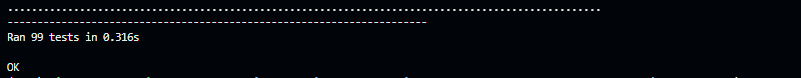

<p>see the full test coverage report [here](https://simontagbor.github.io/lyfy-test-coverag-report/index.html)</p>


<p>In total, the code coverage is about 99% and all tests 71 tests passed. The only module not tested is the `serviceable.py` which is an interface for serviceable objects like cars. I can safely assume that the interface is correctly implemented since all the derived classes from the interface are acting as expected.</p>

```bash
python3 -m unittest -v
```

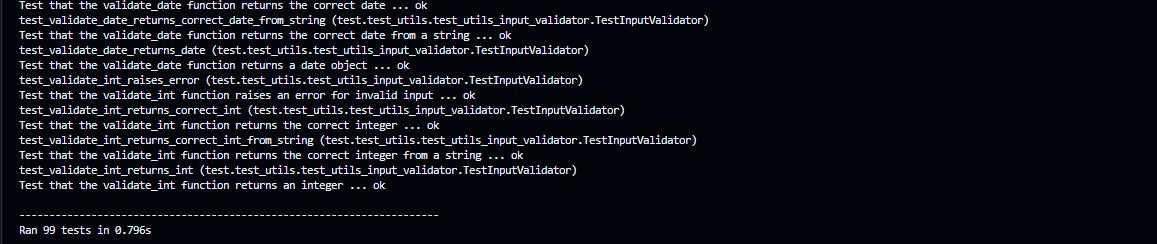

### Task 4 - Implement New Tire Servicing Criteria

<p>Now that the codebase is more maintainable and scalable, I implemented new tire servicing criteria. However, I used the <a href="http://www.jamesshore.com/v2/books/aoad1/test_driven_development">Test-Driven Development (TDD)</a> approach to implement the new tire servicing criteria.</p>

#### Test-Driven Development (TDD) Approach

<p>Test-driven development <a href="http://www.jamesshore.com/v2/books/aoad1/test_driven_development">(TDD)</a> is a software development process that relies on the repetition of a very short development cycle: first, the developer writes an (initially failing) automated test case that defines a desired improvement or new function, then produces the minimum amount of code to pass that test, and finally refactors the new code to acceptable standards.</p>

##### My Steps

<ol>
<li>Update the <code>test_car.py</code> module to include a new test case for the new tire servicing criteria.</li>
<li>Add new tests for tire objects and tire servicing criteria.</li>
<li>Run the tests to ensure that the new tests fail.</li>
<li>Implement the new tire servicing criteria in the <code>car.py</code> module by ensuring that the car class has tire attributes. Implement tire-related classes and tire servicing criteria in the <code>tire</code> directory.</li>
<li>Run the tests to ensure that the new tests pass.</li>
</ol>

## Results
<p>After completing the tasks, I achieved the following results:
</p>
<div class="card text-white bg-primary mb-3" style="max-width: 20rem;">
<div class="card-header">Results</div>
<div class="card-body">
<ul class="list-group">
<li class="list-group-item d-flex justify-content-between align-items-center">
The backend Business Logic for the Fleet Management System is now Modular and Scalable.
<span>⭐</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
The codebase now has a <a href="https://simontagbor.github.io/lyfy-test-coverag-report/index.html">test coverage</a> of 99%.
<span>⭐</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
The new tire servicing criteria were implemented and tested to spec.
<span>⭐</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
The codebase is now well documented to improve collaboration with other developers.
<span>⭐</span>
</li>
</ul>  
 </div>
</div>

### Sanitized Codebase at a Glance

```python
├── .
│   ├── serviceable.py
│   ├── car.py
│   ├── car_factory.py
│   ├── .gitingore
│   ├── README.md
|   ├── battery
|   |   |── __init__.py
|   |   ├── base_battery.py
|   |   ├── spindler_battery.py
|   |   ├── nubbin_battery.py
|   ├── engine
|   |   |── __init__.py
|   |   ├── base_engine.py
|   |   ├── capulet_engine.py
|   |   ├── wiloughby_engine.py
|   |   |── sternman_engine.py
|   ├── tire
|   |   |── __init__.py
|   |   ├── base_tire.py
|   |   ├── carrigan_tire.py
|   |   ├── octo_prime_tire.py
|   ├── test
|   |   ├── __init__.py
|   |   ├── test_battery
|   |   |   ├── test_battery.py
|   |   ├── test_car
|   |   |   ├── __init__.py
|   |   |   ├── test_car.py
|   |   |   ├── test_car_factory.py
|   |   ├── test_engine
|   |   |   ├── __init__.py
|   |   |   ├── test_engine.py
|   |   ├── test_tire
|   |   |   ├── __init__.py
|   |   |   ├── test_tire.py
|   |   ├── test_utils
|   |   |   ├── __init__.py
|   |   |   ├── test_input_validator.py
|   ├── utils
|   |   |── __init__.py
|   |   ├── input_validator.py
```


:::{.column-page}

## Key Learning Outcomes

<p>I enjoyed working on this project and learned a lot about the following:</p>

<ol>
<li>
<p><strong>Design Patterns</strong>: I learned about different design patterns such as the Factory Method Pattern and Strategy Pattern. I learned how to use these patterns to create a more scalable and maintainable codebase. I will always have it in mind that different design patterns can be used to solve different problems and understanding the problem domain is key to choosing the right design pattern.</P>
</li>
<li>
<p><strong>Test-Driven Development (TDD)</strong>: having known about the concept for a while, I finally got to use it in my workflow as a developer. I saw firsthand that TDD is a great way to ensure that the code is working as expected and to catch bugs early in the development process.</p>
</li>
<li>
<p><strong>Unit Testing</strong>: I reinforced my understanding of unit testing techniques and I am now committed to writing extensive unit tests in future projects. I also learned how to use the <code>@patch</code> decorator from the <code>unittest</code> module to mock the creation of objects. I also discovered a neat way to measure the coverage of tests inside the codebase using the <code>coverage</code> package.</p>
</li>
</ol>

<p>Feel free to reach out to me on <a href="https://twitter.com/clawd_johan">X</a> or <a href="https://www.linkedin.com/in/tagbor-simon-gabriel/">LinkedIn</a> if you have any questions or feedback about this project. I would love to hear from you.</p>

:::

<!-- Modals Page modals -->
<script src="assets/GithubPinner.js"></script>
<div class="modal-about">
<div class="modal-dialogue">
<div class="modal-content">
<div class="modal-header">
<button type="button" class="btn-close" data-bs-dismiss="modal" aria-label="Close">
<span aria-hidden="true"></span>
</button>
<h5 class="modal-title">Learning New Skills, One Project at a Time..</h5>
</div>
  <!-- Modal content -->
<div class="github-pinner flat" data="https://github.com/Simontagbor" style="visibility: hidden;"></div>
<div class="developer-info">
<p>
This is a brief description of the developer I am excited for what lies ahead this is going to look great!!
</p>
<div class="icon-container">
<p><a href="https://twitter.com/clawd_johan"><img id="social-icon" src="assets/x.png" alt="X Icon"></a> <a href="https://github.com/Simontagbor"><img id="social-icon" src="assets/github.png" alt="Github Icon"></a> <a href="https://www.linkedin.com/in/tagbor-simon-gabriel/"><img id="social-icon" src="assets/linkedin.png" alt="LinkedIn Icon"></a></p>
</div>
</div>
</div>
</div>
</div>
<div class="modal-projects">
<div class="modal-dialogue">
<div class="modal-content">
<div class="modal-header">
<button type="button" class="btn-close" data-bs-dismiss="modal" aria-label="Close">
<span aria-hidden="true"></span>
</button>
<h5 class="modal-title">Checkout These Projects</h5>
</div>
  <!-- Modal content -->
<div class="github-pinner flat" data="https://github.com/Simontagbor/forage-lyft-starter-repo" style="visibility: hidden;"></div>
<div class="github-pinner flat" data="https://github.com/Simontagbor/forage-lyft-starter-repo" style="visibility: hidden;"></div>
<div class="github-pinner flat" data="https://github.com/Simontagbor/forage-lyft-starter-repo" style="visibility: hidden;"></div>
</div>
</div>
</div>

<!-- Project Summary -->
<div class="modal">
<div class="modal-dialog" role="document">
<div class="modal-content">
<div class="modal-header">
<button type="button" class="btn-close" data-bs-dismiss="modal" aria-label="Close">
<span aria-hidden="true"></span>
</button>
<h5 class="modal-title">Project Summary</h5>
</div>
<p>After successfully implementing the redesigned codebase, here are some notable outcomes:</p>
<ul class="list-group">
<li class="list-group-item d-flex justify-content-between align-items-center">
The Business Logic components are now loosely coupled.
<span>⭐</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
The Re-designed Codebase now has a test coverage of 99%.
<span>⭐</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
The Codebase Now Smoothly Integrates New Components.
<span>⭐</span>
</li>
<li class="list-group-item d-flex justify-content-between align-items-center">
The codebase is now well-documented to improve collaboration.
<span>⭐</span>
</li>
</ul>  
</div>
</div>
</div>
</div>